## Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [15]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [16]:
%matplotlib inline

In [17]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, noise=6, coef=True, random_state=5)

Масштабируем признаки методом стандартизации (пробовал нормализацию, но не получилось, видимо, из-за отрицательных значений

In [18]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [19]:
data

array([[-1.81414849, -0.27550451],
       [-0.13423335, -0.40058492],
       [ 0.10230238,  0.28698506],
       ...,
       [-1.36203808,  0.7847698 ],
       [ 0.20092337,  0.66908273],
       [-0.2425401 , -0.05477177]])

In [20]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [21]:
# Переменные имеющие названия *_sgd - используются для стохастического градиентного бустинга

w = np.zeros(2)
w_sgd = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]
w_list_sgd = [w_sgd.copy()]

# список значений ошибок после каждой итерации
errors = []
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# стохастический градиентный спуск
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки_sgd
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w_sgd - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_sgd) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w_sgd, ord=2)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(mserror(data, new_w, target))
    
    iter_num += 1
    w_sgd = new_w


iter_num = 0
weight_dist = np.inf
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
       
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w

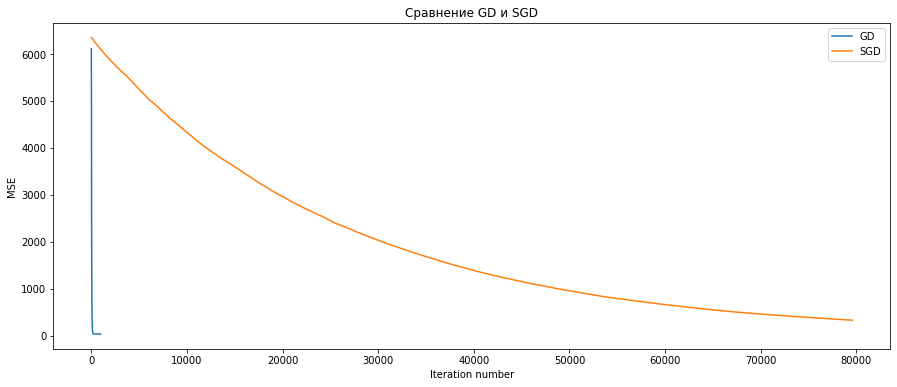

In [22]:
plt.figure(figsize=(15, 6))
plt.title('Сравнение GD и SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors, label='GD')
plt.plot(range(len(errors_sgd)), errors_sgd, label='SGD')
plt.legend()
plt.show()

In [23]:
len(errors), len(errors_sgd)

(969, 79592)

## Задание 2

Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.

In [25]:
# Переменные имеющие названия *_sgd - используются для стохастического градиентного бустинга

w = np.zeros(2)
w_sgd = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]
w_list_sgd = [w_sgd.copy()]

# список значений ошибок после каждой итерации
errors = []
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# коэффициент регуляризации
lambd = 0.1

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# стохастический градиентный спуск
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки_sgd
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w_sgd - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w_sgd) - target[train_ind])) / target.shape[0] + 2*lambd*w_sgd

    weight_dist = np.linalg.norm(new_w - w_sgd, ord=2)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(mserror(data, new_w, target))
    
    iter_num += 1
    w_sgd = new_w


iter_num = 0
weight_dist = np.inf
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
       
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0] + 2*lambd*w

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in subtract


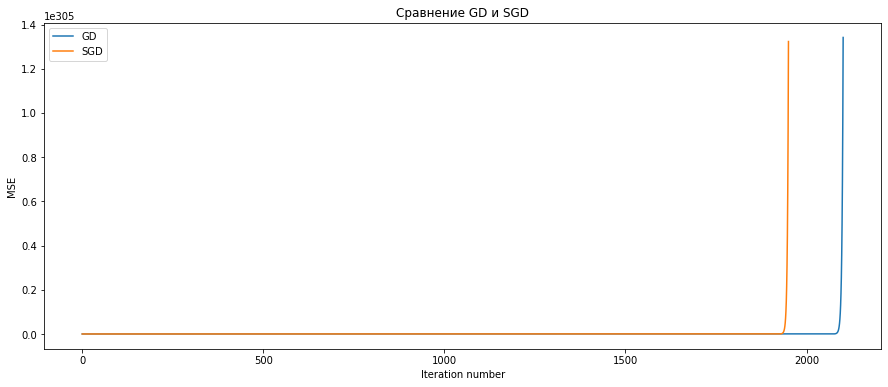

In [26]:
plt.figure(figsize=(15, 6))
plt.title('Сравнение GD и SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors, label='GD')
plt.plot(range(len(errors_sgd)), errors_sgd, label='SGD')
plt.legend()
plt.show()

In [27]:
len(errors), len(errors_sgd)

(4223, 3916)